In [1]:
#Credit Card Fraud Detection

#Generic Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./Dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
#To check whether any of the columns have null values so no null values found
df.isnull().sum().max()

0

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#Number of records in the dataset
print('Number of records:',len(df))
print('Number of columns:',len(df.columns))

Number of records: 284807
Number of columns: 31


In [7]:
#Class is the target variable 
#0 - Not Fraud transaction
#1 - being Fraud transaction 
print('Classes found in dataset:',df.Class.unique(),'\n')

#Lets check the class distribution in the dataset
print('Number of records with Class 0:',df['Class'].value_counts()[0])
print('Percentage of Class 0(No Frauds): ',df['Class'].value_counts()[0]*100/len(df))
print('\n')
print('Number of records with Class 1:',df['Class'].value_counts()[1])
print('Percentage of Class 1(Frauds): ',df['Class'].value_counts()[1]*100/len(df))

#Classes are imbalanced in the dataset so we cant directly consider accuracy as the model performance to evaluate the models


Classes found in dataset: [0 1] 

Number of records with Class 0: 284315
Percentage of Class 0(No Frauds):  99.827251436938


Number of records with Class 1: 492
Percentage of Class 1(Frauds):  0.1727485630620034


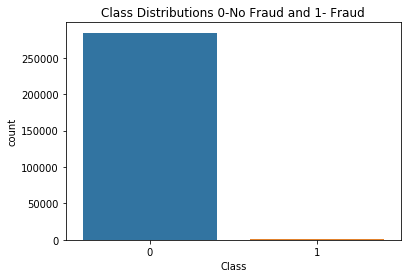

In [8]:
#Histogram of the classes 


sns.countplot(x="Class", data=df)
plt.title('Class Distributions 0-No Fraud and 1- Fraud')
plt.show()

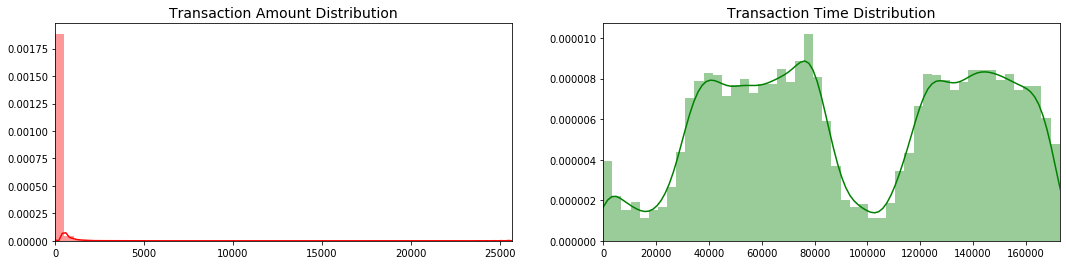

In [9]:
#Amount and Time of transaction distribution 
df.columns

amount_vals=df['Amount'].values
time_vals=df['Time'].values

fig,ax=plt.subplots(1,2,figsize=(18,4))

sns.distplot(amount_vals,ax=ax[0],color='r')
ax[0].set_xlim([min(amount_vals),max(amount_vals)])
ax[0].set_title('Transaction Amount Distribution',fontsize=14)

sns.distplot(time_vals,ax=ax[1],color='g')
ax[1].set_xlim([min(time_vals),max(time_vals)])
ax[1].set_title('Transaction Time Distribution',fontsize=14)
                

plt.show()


In [10]:
df.head()
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
#By looking at Standard distirbutions of other features - V1 to V28 which are already normalized
#Time and Amount are the only features which are not normalized
#Before continuing with modelling the data we have to normalize these two features

from sklearn.preprocessing import StandardScaler,RobustScaler

#We use robust scaler compared to standard scaler as robust scaler is non prone to outliers
rob_scaler=RobustScaler()

df['Scaled_Amount']=rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Scaled_Time']=rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.head()

df.drop(['Time','Amount'],axis=1,inplace=True)


In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [13]:
#As we already found that classes are imbalanced in the dataset 
#To make algorithms efficient and not bias towards one class we have to subsample and 
#create balanced dataset which contains same number of fraud and non fraud transactions

#Before subsampling - we have to divide data into test and train 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


X=df.drop(['Class'],axis=1)
y=df['Class']

ssf=StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

for trainidx,testidx in ssf.split(X,y):
    Original_Xtraindata,Original_Xtestdata=X.iloc[trainidx],X.iloc[testidx]
    Original_ytraindata,Original_ytestdata=y.iloc[trainidx],y.iloc[testidx]
    
    
#Convertng into numpy array

Xtraindata=Original_Xtraindata.values
ytraindata=Original_ytraindata.values

Xtestdata=Original_Xtestdata.values
ytestdata=Original_ytestdata.values


trainclass,traincount=np.unique(ytraindata,return_counts=True)
print('Train Class Distribution in Percentage:',np.round(traincount*100/len(ytraindata),2),'\n')

testclass,testcount=np.unique(ytestdata,return_counts=True)
print('Test Class Distribution in Percentage:',np.round(testcount*100/len(ytestdata),2))



Train Class Distribution in Percentage: [99.83  0.17] 

Test Class Distribution in Percentage: [99.83  0.17]


In [14]:
#Random undersampling

df.head()

df=df.sample(frac=1)

class_fraud=df.loc[df['Class']==1]
len(class_fraud) ## 492 records found for class now we have to have the same number of the class 0 

class_non_fraud=df.loc[df['Class']==0][:492]
len(class_non_fraud)

class_non_fraud.head()
class_fraud.head()

normal_distributed_df=pd.concat([class_fraud,class_non_fraud])

#Shuffle rows in dataframe
newdf=normal_distributed_df.sample(frac=1, random_state=42)

newdf.head()
print('Number of Non Fraud Transactions in new dataframe:',newdf['Class'].value_counts()[0])
print('Number of Fraud Transactions in new dataframe:',newdf['Class'].value_counts()[1])

Number of Non Fraud Transactions in new dataframe: 492
Number of Fraud Transactions in new dataframe: 492


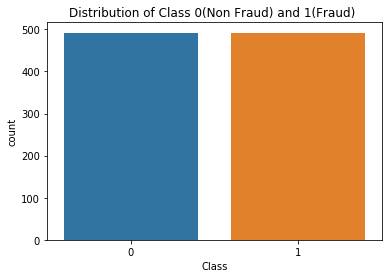

In [15]:

sns.countplot(x='Class',data=newdf)
plt.title('Distribution of Class 0(Non Fraud) and 1(Fraud) ')

plt.show()

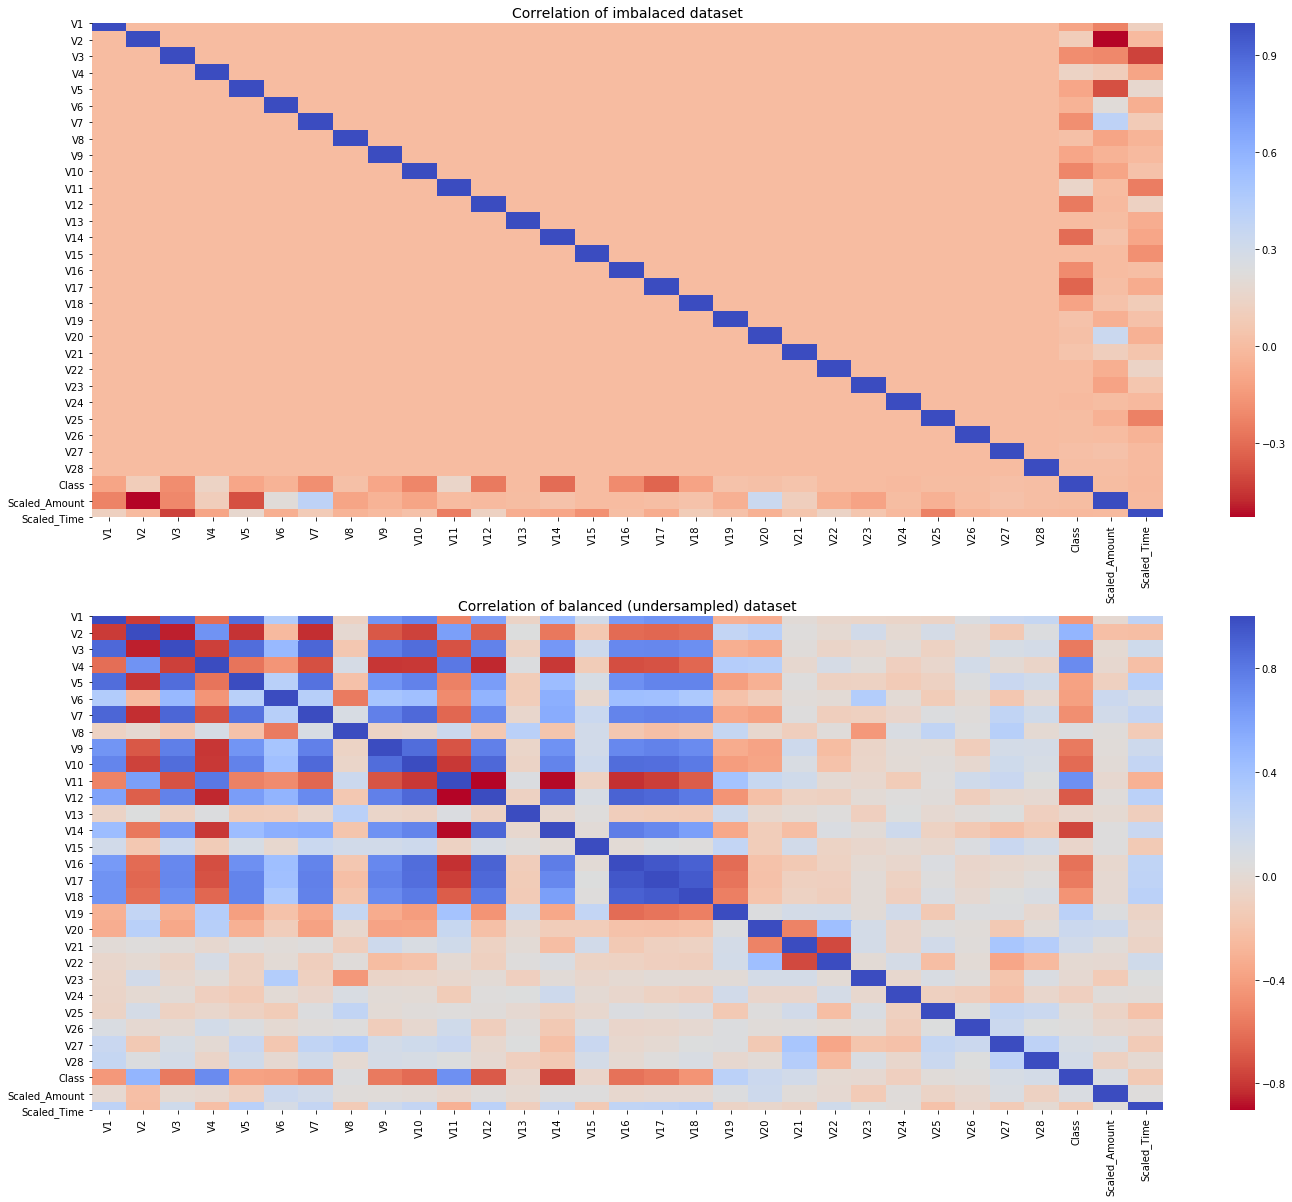

In [16]:
#Now distribution of classes is absolutely fine
#Analyzing correlation between the predictors

oldcorr=df.corr()
newcorr=newdf.corr()

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))


sns.heatmap(oldcorr,ax=ax1,cmap='coolwarm_r', annot_kws={'size':20})
ax1.set_title('Correlation of imbalaced dataset',fontsize=14)

sns.heatmap(newcorr,ax=ax2,cmap='coolwarm_r', annot_kws={'size':20})
ax2.set_title('Correlation of balanced (undersampled) dataset',fontsize=14)


plt.show()



#With this we can see the predictors dont even correlate much due to imbalanced class distributions
#With undersampled balanced dataset shows the correlation between predictors which will help to 
#reduce dimensionality and also efficency of the algorithms


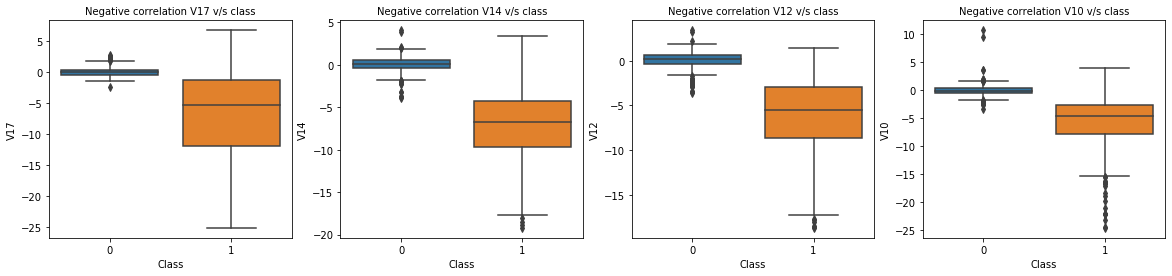

In [17]:
#By looking at the correlation of predictors wrt to the class variables 
#we see the V17,V14,V12,V10 are negatively correlated in that case the lower the value of the features it will be fraud transactions 


fig,axes=plt.subplots(ncols=4,figsize=(20,4))

sns.boxplot(x='Class',y='V17',data=newdf,ax=axes[0])
axes[0].set_title('Negative correlation V17 v/s class',fontsize=10)


sns.boxplot(x='Class',y='V14',data=newdf,ax=axes[1])
axes[1].set_title('Negative correlation V14 v/s class',fontsize=10)


sns.boxplot(x='Class',y='V12',data=newdf,ax=axes[2])
axes[2].set_title('Negative correlation V12 v/s class',fontsize=10)


sns.boxplot(x='Class',y='V10',data=newdf,ax=axes[3])
axes[3].set_title('Negative correlation V10 v/s class',fontsize=10)

plt.show()

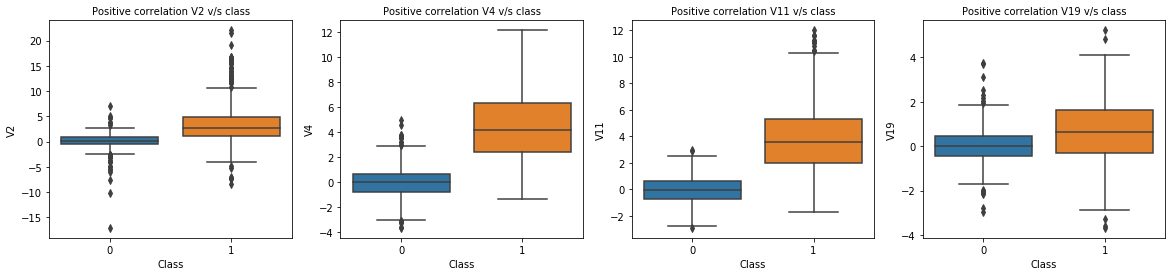

In [18]:
#By looking at the correlation of predictors wrt to the class variables 
#we see the V2,V4,V11,V19 are positively correlated in that case the higher the value of the features it will be fraud transactions 


fig,axes=plt.subplots(ncols=4,figsize=(20,4))

sns.boxplot(x='Class',y='V2',data=newdf,ax=axes[0])
axes[0].set_title('Positive correlation V2 v/s class',fontsize=10)


sns.boxplot(x='Class',y='V4',data=newdf,ax=axes[1])
axes[1].set_title('Positive correlation V4 v/s class',fontsize=10)


sns.boxplot(x='Class',y='V11',data=newdf,ax=axes[2])
axes[2].set_title('Positive correlation V11 v/s class',fontsize=10)


sns.boxplot(x='Class',y='V19',data=newdf,ax=axes[3])
axes[3].set_title('Positive correlation V19 v/s class',fontsize=10)

plt.show()

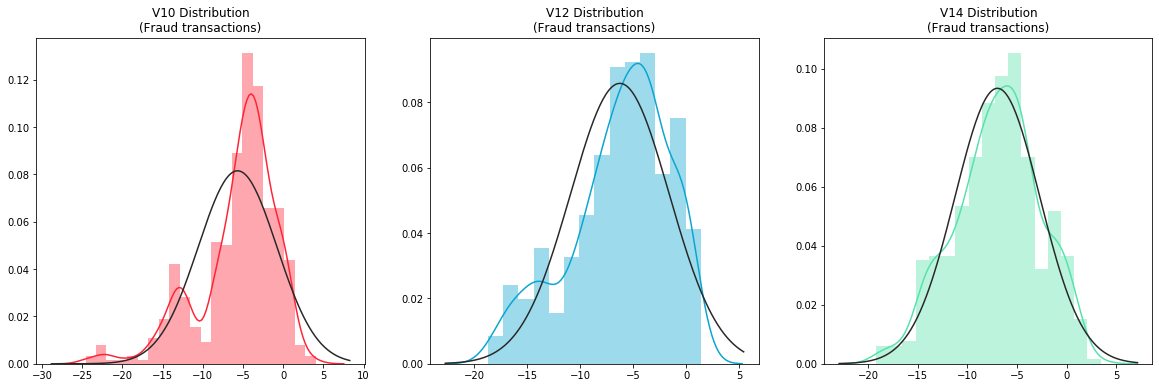

In [19]:
#Visualizing using plots - normal distribution we can identify which features have more outliers possible 
#lets plot the normal distributions of these features and then check for outliers

from scipy.stats import norm

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,6))

v10_vals=newdf['V10'].loc[newdf["Class"]==1].values
sns.distplot(v10_vals,fit=norm,ax=ax1,color='#ff2435')
ax1.set_title('V10 Distribution\n(Fraud transactions)')

v12_vals=newdf['V12'].loc[newdf["Class"]==1].values
sns.distplot(v12_vals,fit=norm,ax=ax2,color='#0aa5d1')
ax2.set_title('V12 Distribution\n(Fraud transactions)')

v14_vals=newdf['V14'].loc[newdf["Class"]==1].values
sns.distplot(v14_vals,fit=norm,ax=ax3,color='#58e1ab')
ax3.set_title('V14 Distribution\n(Fraud transactions)')


plt.show()

In [20]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = newdf['V14'].loc[newdf['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

newdf = newdf.drop(newdf[(newdf['V14'] > v14_upper) | (newdf['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = newdf['V12'].loc[newdf['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
newdf = newdf.drop(newdf[(newdf['V12'] > v12_upper) | (newdf['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(newdf)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = newdf['V10'].loc[newdf['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
newdf = newdf.drop(newdf[(newdf['V10'] > v10_upper) | (newdf['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(newdf)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.8220867423816, -18.4937733551053, -19.2143254902614, -18.049997689859396]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.4311310279993, -18.683714633344298, -18.553697009645802, -18.047596570821604]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.920334958342141
V10 outliers: [-18.9132433348732, -

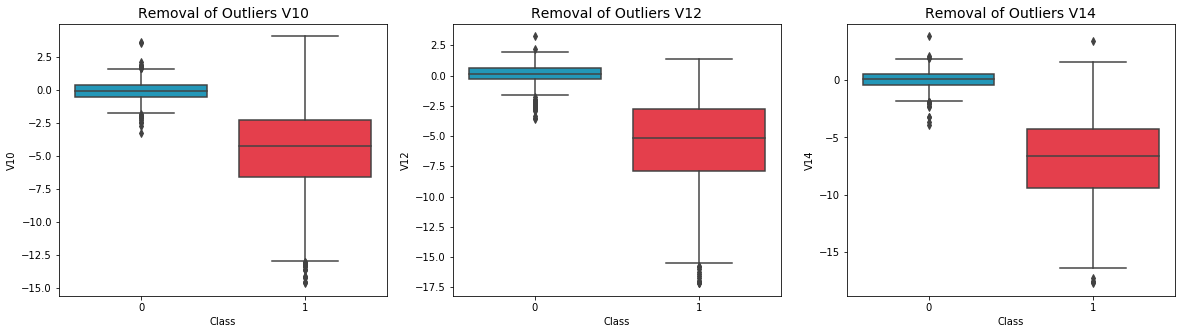

In [21]:
###Now we can verify the box plots and see the status of outliers by which we can confirm that the outliers have been handled


fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))

sns.boxplot(x='Class',y='V10',data=newdf,ax=ax1,palette=['#0aa5d1','#ff2435'])
ax1.set_title('Removal of Outliers V10',fontsize=14)

sns.boxplot(x='Class',y='V12',data=newdf,ax=ax2,palette=['#0aa5d1','#ff2435'])
ax2.set_title('Removal of Outliers V12',fontsize=14)

sns.boxplot(x='Class',y='V14',data=newdf,ax=ax3,palette=['#0aa5d1','#ff2435'])
ax3.set_title('Removal of Outliers V14',fontsize=14)

plt.show()

In [22]:
#Dimension Reductionality and clustering

from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.manifold import TSNE

newdf.head()

X=newdf.drop('Class',axis=1)
y=newdf['Class']

tstart=time.time()
X_tsne=TSNE(n_components=2,random_state=42).fit_transform(X)
tend=time.time()

print('Time Taken for tSNE:{:.2}s'.format(tend-tstart))

tstart=time.time()
X_pca=PCA(n_components=2,random_state=42).fit_transform(X)
tend=time.time()

print('Time Taken for PCA:{:.2}s'.format(tend-tstart))


tstart=time.time()
X_svd=TruncatedSVD(n_components=2,random_state=42,algorithm='randomized').fit_transform(X)
tend=time.time()

print('Time Taken for SVD:{:.2}s'.format(tend-tstart))




Time Taken for tSNE:3.2s
Time Taken for PCA:0.038s
Time Taken for SVD:0.002s


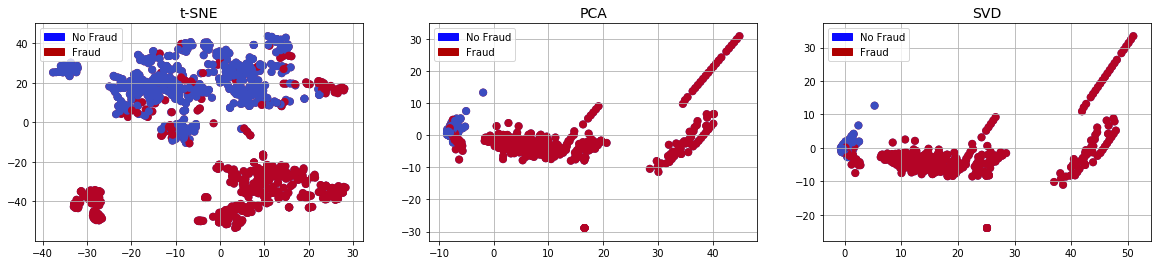

In [23]:
#Cluster plots from the components of reduced X to one dimensional

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,4))

bluepatch=mpatches.Patch(label="No Fraud",color='#0A0AFF')
redpatch=mpatches.Patch(label="Fraud",color='#AF0000')

ax1.scatter(X_tsne[:,0],X_tsne[:,1],c=(y==0),cmap='coolwarm',label="No Fraud",linewidths=2)
ax1.scatter(X_tsne[:,0],X_tsne[:,1],c=(y==1),cmap='coolwarm',label="Fraud",linewidths=2)
ax1.grid(True)
ax1.set_title('t-SNE',fontsize=14)
ax1.legend(handles=[bluepatch,redpatch])


ax2.scatter(X_pca[:,0],X_pca[:,1],c=(y==0),cmap='coolwarm',label="No Fraud",linewidths=2)
ax2.scatter(X_pca[:,0],X_pca[:,1],c=(y==1),cmap='coolwarm',label="Fraud",linewidths=2)
ax2.grid(True)
ax2.set_title('PCA',fontsize=14)
ax2.legend(handles=[bluepatch,redpatch])


ax3.scatter(X_svd[:,0],X_svd[:,1],c=(y==0),cmap='coolwarm',label="No Fraud",linewidths=2)
ax3.scatter(X_svd[:,0],X_svd[:,1],c=(y==1),cmap='coolwarm',label="Fraud",linewidths=2)
ax3.grid(True)
ax3.set_title('SVD',fontsize=14)
ax3.legend(handles=[bluepatch,redpatch])

plt.show()

#With this clustering plots we clearly see the classes separate very well with which we can confirm that the predictive models 
#will perform better

In [24]:
#UnderSampling - Classification Algorithms

#We will model undersampled data using four classifiers 
'''
Logistic Regression - two class classification
SVC - Support Vector Classifier
Decision tree classifier - Ensembling to improve performance
k-NN - K Nearets Neighbors
'''
newdf.head()
print('Number of records in under sampled records: {}'.format(len(newdf)))

Number of records in under sampled records: 946


In [25]:
from sklearn.model_selection import cross_val_score

X=newdf.drop('Class',axis=1)
y=newdf['Class']

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

X_train=Xtrain.values
#print(X_train.shape)
X_test=Xtest.values
#print(X_test.shape)

y_train=ytrain.values
#print(ytrain.shape)
y_test=ytest.values
#print(ytest.shape)

classifiers= {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}


for key,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    train_score=cross_val_score(classifier,X_train,y_train,cv=5)
    
    print('Classifier',classifier.__class__.__name__,"has training score of ", round(train_score.mean(),2)*100,'% accuracy score')
    




Classifier LogisticRegression has training score of  94.0 % accuracy score
Classifier KNeighborsClassifier has training score of  93.0 % accuracy score
Classifier SVC has training score of  94.0 % accuracy score
Classifier DecisionTreeClassifier has training score of  92.0 % accuracy score


In [26]:
#Parameter tuning for different classifiers using Grid Search with cross validation 
#Pass each classifier different parameters and then grid search will return better estimator of the classifier

from sklearn.model_selection import GridSearchCV


# Logistic Regression Tuning
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_


#k-NN Tuning
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

#Support Vector Classifier Tuning
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

# DecisionTree Classifier Tuning
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_




In [27]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.57%
Knears Neighbors Cross Validation Score 93.78%
Support Vector Classifier Cross Validation Score 94.57%
DecisionTree Classifier Cross Validation Score 93.12%


In [28]:
from sklearn.model_selection import StratifiedKFold


underSample_X=df.drop(['Class'],axis=1)
underSample_y=df['Class']

ssf=StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

for trainidx,testidx in ssf.split(underSample_X,underSample_y):
    underSample_Xtrain,underSample_Xtest=underSample_X.iloc[trainidx],underSample_X.iloc[testidx]
    underSample_ytrain,underSample_ytest=underSample_y.iloc[trainidx],underSample_y.iloc[testidx]

undersample_Xtrain = underSample_Xtrain.values
undersample_Xtest = underSample_Xtest.values
undersample_ytrain = underSample_ytrain.values
undersample_ytest = underSample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(underSample_X.values, underSample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in ssf.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(Xtraindata[test], ytraindata[test]))
    undersample_precision.append(precision_score(ytraindata[test], undersample_prediction))
    undersample_recall.append(recall_score(ytraindata[test], undersample_prediction))
    undersample_f1.append(f1_score(ytraindata[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(ytraindata[test], undersample_prediction))
    

NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [29]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

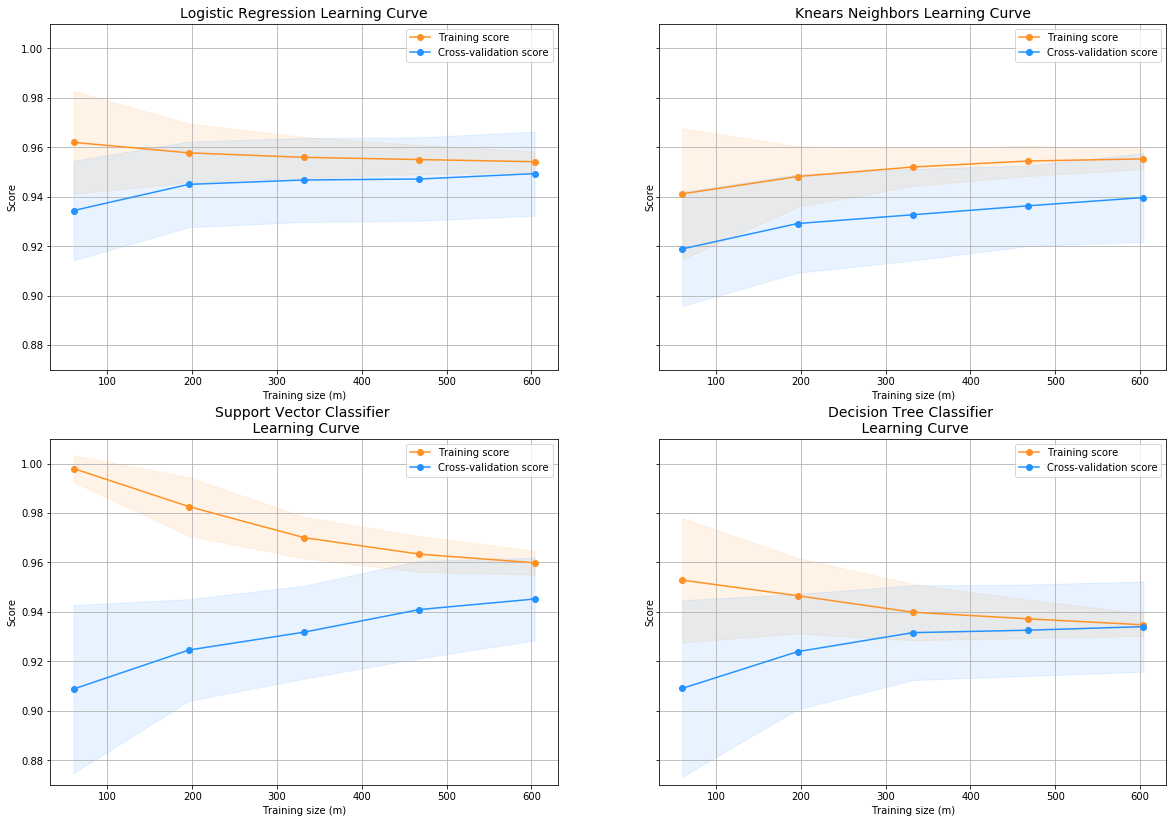

In [30]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plt=plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)
plt.show()

In [31]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [32]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9793236241422769
KNears Neighbors:  0.9366545301778462
Support Vector Classifier:  0.9774191289735331
Decision Tree Classifier:  0.9300658171124492


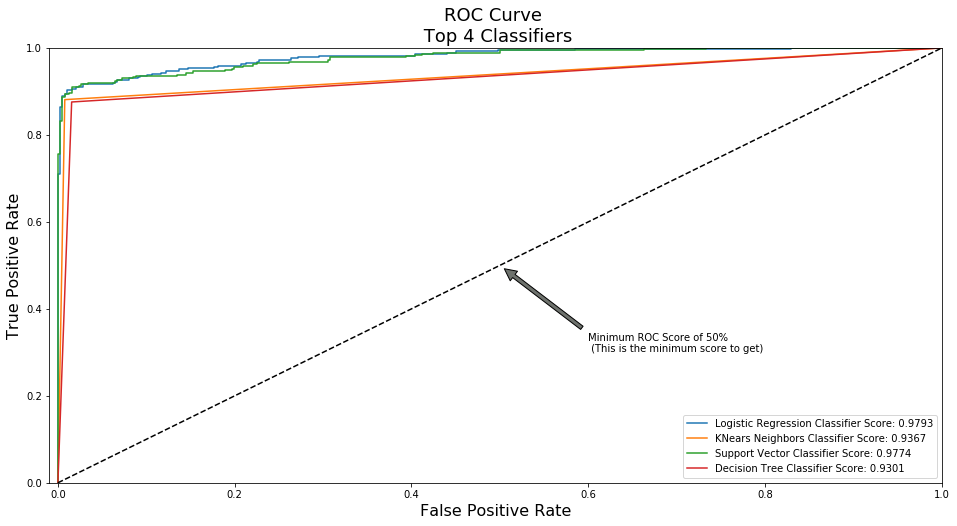

In [33]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

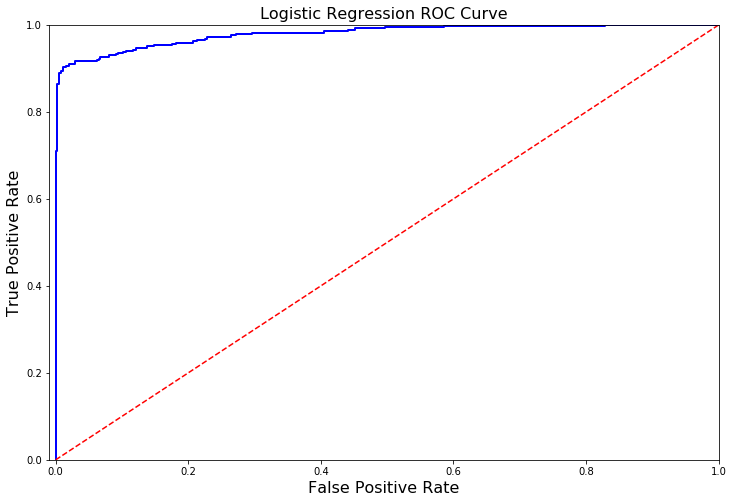

In [34]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [35]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [36]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.88
Precision Score: 0.81
F1 Score: 0.84
Accuracy Score: 0.84
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.85
Precision Score: 0.00
Recall Score: 0.12
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [37]:
undersample_y_score = log_reg.decision_function(Xtestdata)

In [38]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(ytestdata, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.05


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.05')

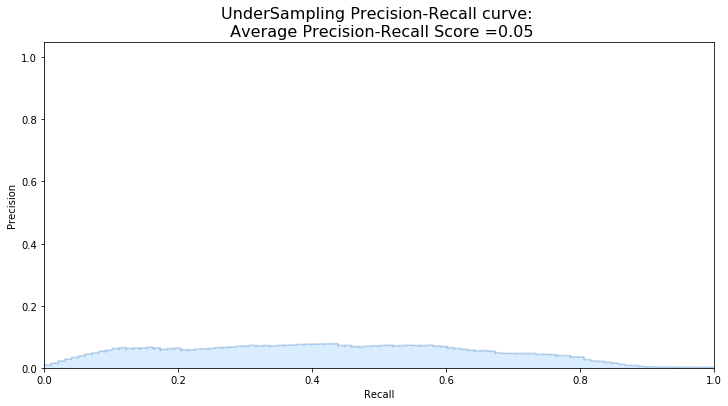

In [39]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(ytestdata, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [40]:
# SMOTE stands for Synthetic Minority Over-sampling Technique. 
# Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. 
# This is another alternative for solving the "class imbalance problems".

'''
SMOTE is better than random undersampling as it retains full information there is no information loss in this method
Accuracy is better than random sampling but it takes more time compared to under sampling due to its data size
'''

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(Xtraindata), len(ytraindata)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(Xtestdata), len(ytestdata)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
for train, test in ssf.split(Xtraindata, ytraindata):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(Xtraindata[train], ytraindata[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(Xtraindata[test])
    
    accuracy_lst.append(pipeline.score(Xtraindata[test], ytraindata[test]))
    precision_lst.append(precision_score(ytraindata[test], prediction))
    recall_lst.append(recall_score(ytraindata[test], prediction))
    f1_lst.append(f1_score(ytraindata[test], prediction))
    auc_lst.append(roc_auc_score(ytraindata[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)



Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9492469553763689
precision: 0.06071972559133783
recall: 0.9137293086660175
f1: 0.11217076850807414
---------------------------------------------------------------------------------------------------------------------------------------


In [41]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(Xtestdata)
print(classification_report(ytestdata, smote_prediction, target_names=labels))



              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.09      0.86      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.92      0.58     56961
weighted avg       1.00      0.99      0.99     56961



In [42]:
y_score = best_est.decision_function(Xtestdata)

In [43]:
average_precision = average_precision_score(ytestdata, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.70


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.70')

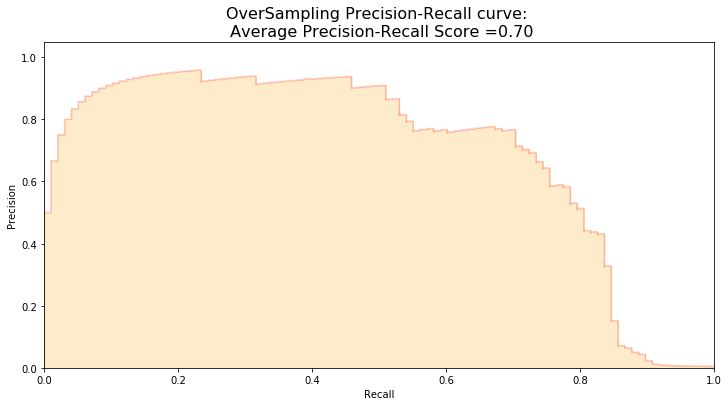

In [44]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(ytestdata, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [45]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(Xtraindata, ytraindata)

In [46]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :4.9512364864349365 sec


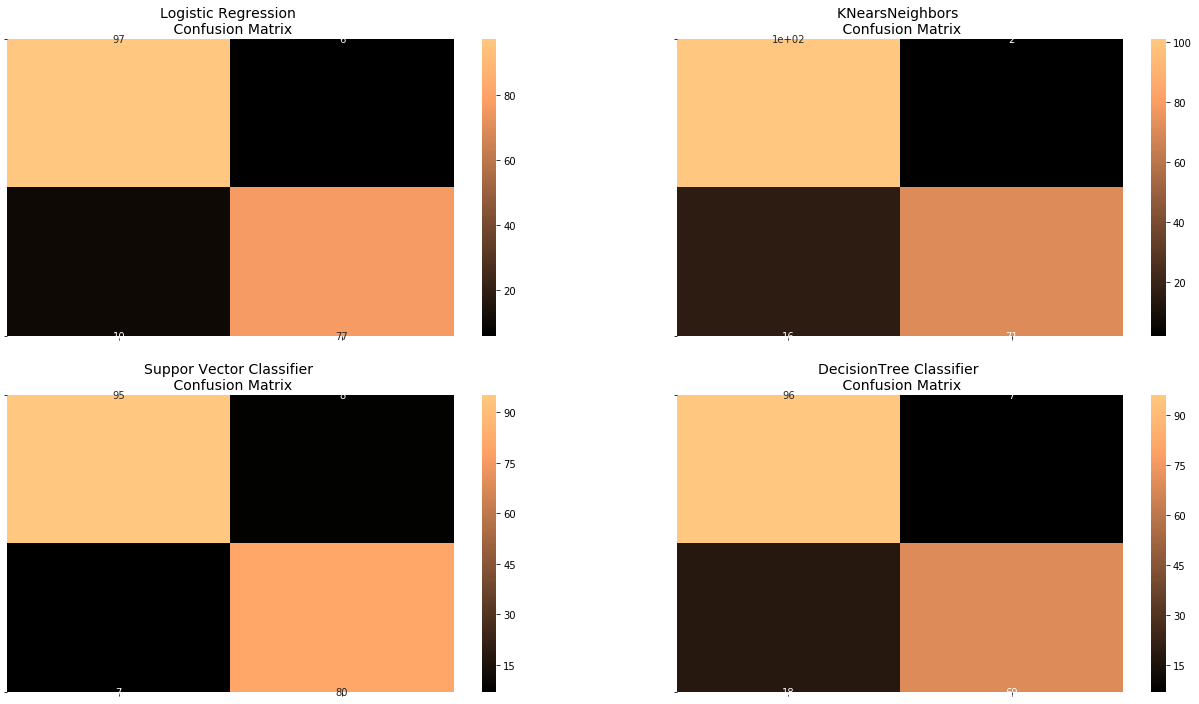

In [47]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()